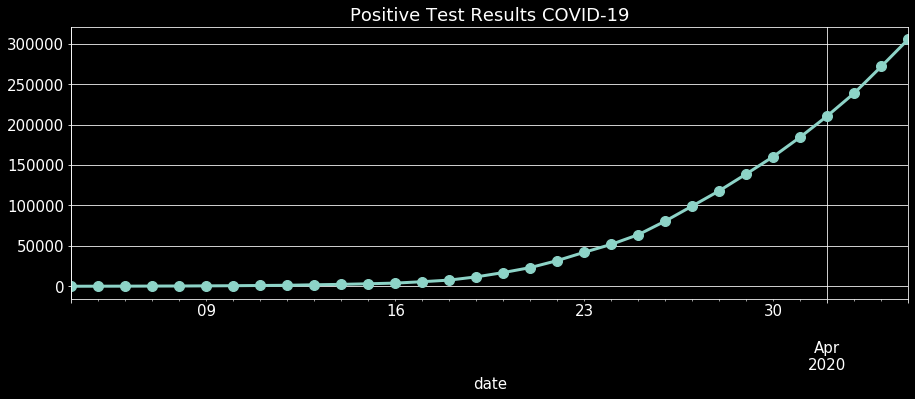

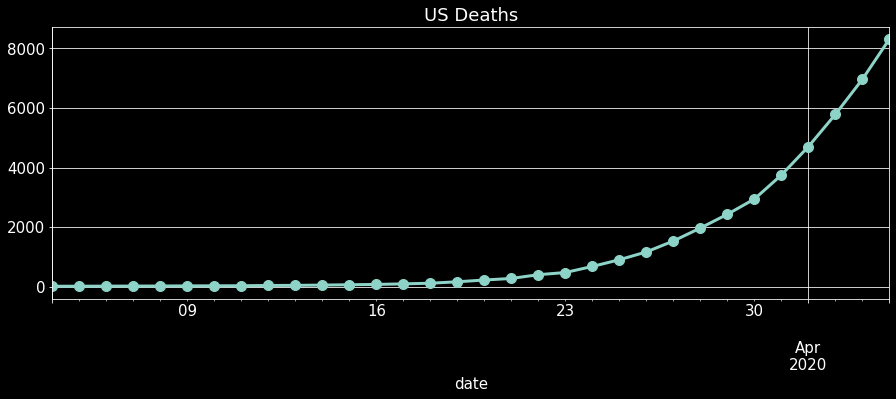

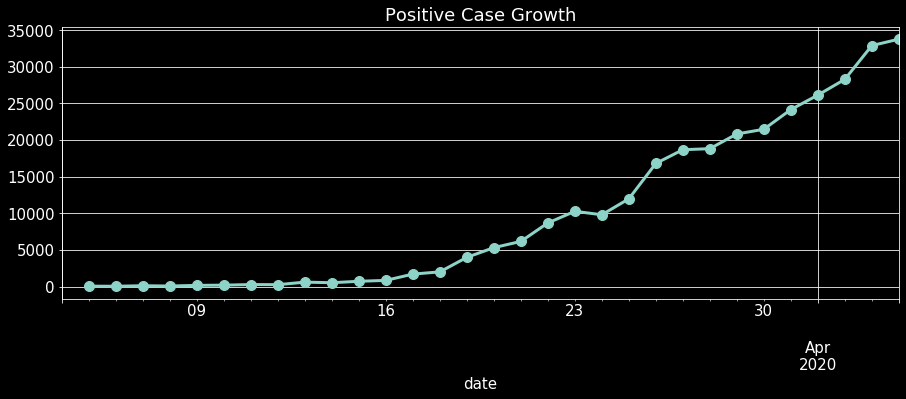

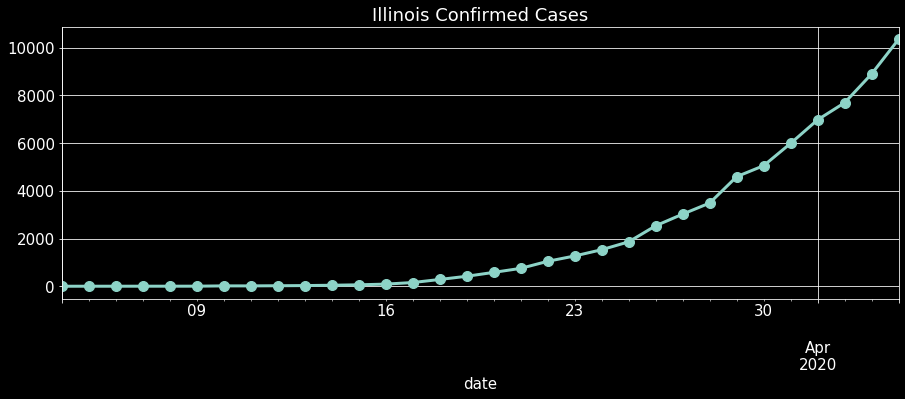

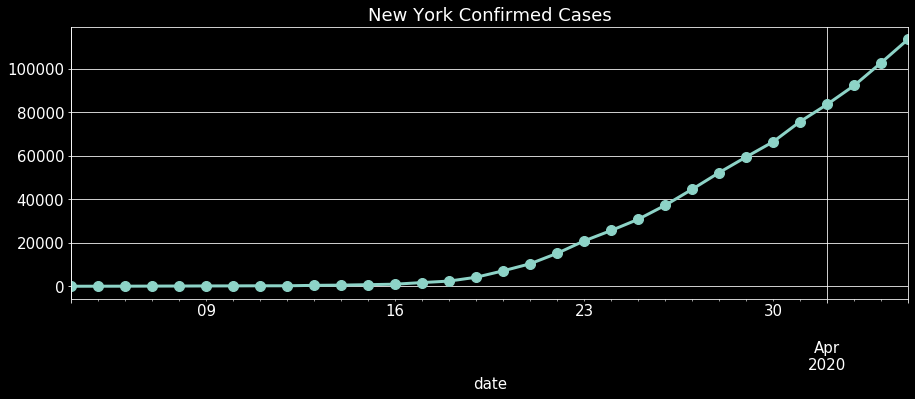

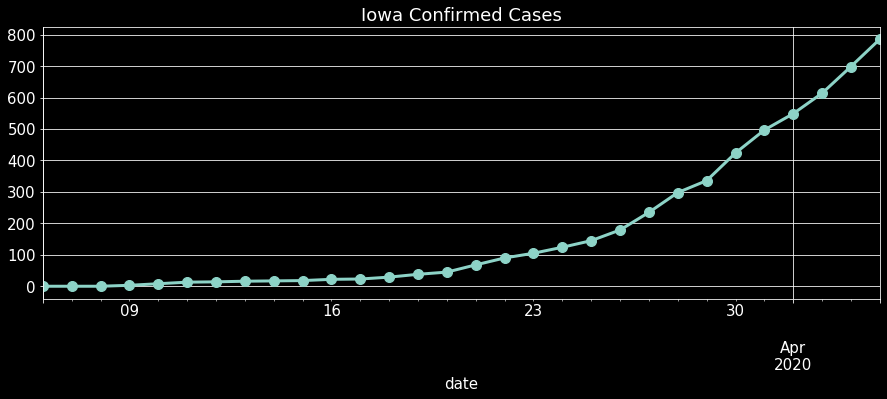

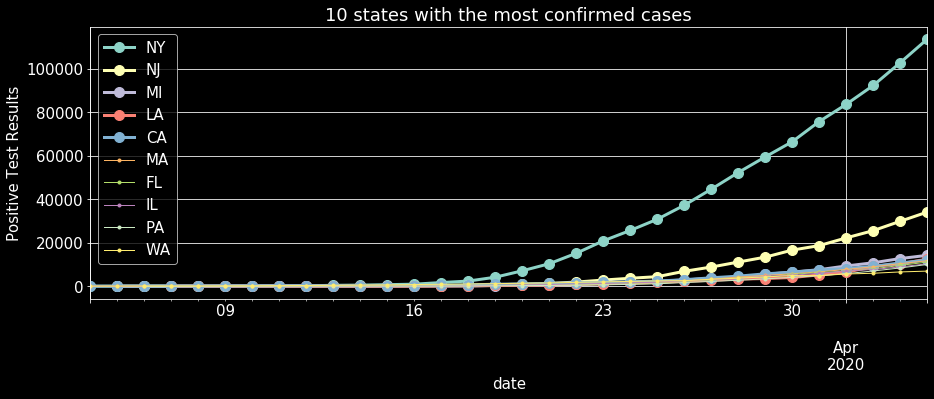

In [95]:
import requests
import json
import pandas as pd
from colour import Color
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')

# Query API
states = requests.get('https://covidtracking.com/api/states/daily').json()
states = pd.DataFrame(states)

us = requests.get('https://covidtracking.com/api/us/daily').json()
us = pd.DataFrame(us)

# Format Data
states.date = pd.to_datetime(states.date, format = '%Y%m%d')
us.date = pd.to_datetime(us.date, format = '%Y%m%d')

states.set_index('date', inplace = True)
us.set_index('date', inplace =  True)
today = states.loc[states.index.max()]

##################################### GRAPHING ###########################################

# NATIONAL POSITIVE 
plt.style.use('dark_background')
matplotlib.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(15,5))
us.positive.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Positive Test Results COVID-19')
plt.grid()
plt.show()
fig.savefig('images/positive_tests.png')

# NATIONAL DEATHS
fig = plt.figure(figsize=(15,5))
us.death.dropna().plot(linewidth=3, marker = 'o', markersize=10)
plt.title('US Deaths')
plt.grid()
plt.show()
fig.savefig('images/deaths.png')

# POSITIVE GROWTH FROM PREVIOUS DAY
us_rev = us.iloc[::-1].positive.diff()
fig = plt.figure(figsize=(15,5))
us_rev.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Positive Case Growth')
plt.grid()
plt.show()
fig.savefig('images/positive_case_growth.png')

# POSITIVE CASES IN ILLINOIS
fig = plt.figure(figsize=(15,5))
states[states.state == 'IL'].positive.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Illinois Confirmed Cases')
plt.grid()
plt.show()
fig.savefig('images/illinois_cases.png')

# POSITIVE CASES IN NY
fig = plt.figure(figsize=(15,5))
states[states.state == 'NY'].positive.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('New York Confirmed Cases')
plt.grid()
plt.show()
fig.savefig('images/ny_cases.png')

# POSITIVE CASES IN IA
fig = plt.figure(figsize=(15,5))
states[states.state == 'IA'].positive.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Iowa Confirmed Cases')
plt.grid()
plt.show()
fig.savefig('images/ia_cases.png')

# POSITIVE CASES IN HIGHEST COUNT CITIES
top_ten = today.sort_values(by='positive', ascending=False)[:10]
ten_states = top_ten.state
fig = plt.figure(figsize=(15,5))
for state in ten_states:
    if state in list(ten_states[:5].values):
        states[states.state == state].positive.plot(label = state, linewidth=3, marker = 'o', markersize=10)
    else:
        states[states.state == state].positive.plot(label = state, linewidth=1, marker = 'o', markersize=3)
plt.title('10 states with the most confirmed cases')
plt.ylabel('Positive Test Results')
plt.legend(loc='upper left')
plt.grid()
plt.show()
fig.savefig('images/top_ten_states.png')

# CASES BY STATE –– MAP
fig = go.Figure(data=go.Choropleth(
    locations=today.state, # Spatial coordinates
    z = today.positive, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Confirmed Cases",
))

fig.update_layout(
    title_text = 'COVID-19 Cases by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()
fig.write_image('images/positive_cases_map.png')

# POSITIVE TEST RATE
today['positive_rate'] = today.positive/today.total
rates = today.sort_values(by='positive_rate', ascending = False)
rates = rates[['state', 'positive_rate', 'death', 'positive']]
rates = rates.set_index('state')
colors = [Color(pick_for=x).get_hex_l() for x in rates.index]
fig = go.Figure([go.Bar(x=rates.index, y=rates.positive_rate, marker_color=colors)])
fig.update_layout(
    title_text = 'Positive Test Rate'
)
fig.show()
fig.write_image('images/positive_test_rate.png')

# MORTALITY RATE
rates['death_rate'] = rates.death/rates.positive
rates = rates.sort_values(by='death_rate', ascending=False)
fig = go.Figure([go.Bar(x=rates.index, y=rates.death_rate, marker_color=colors)])
fig.update_layout(
    title_text = 'Mortality Rate')
fig.show()
fig.write_image('images/mortality_rate.png')

# SAVE DATA
us.reset_index(inplace = True)
states.reset_index(inplace=True)
us.date = us.date.astype(str)
states.date = states.date.astype(str)
national_data = us.to_dict()
state_data = states.to_dict()


data = {'state': state_data,
        'us': national_data}

with open('coronavirus.json', mode='w', encoding='utf-8') as f:
    json.dump(data, f)

with open('coronavirus.json') as f:
    data = json.load(f)
    state = data['state']

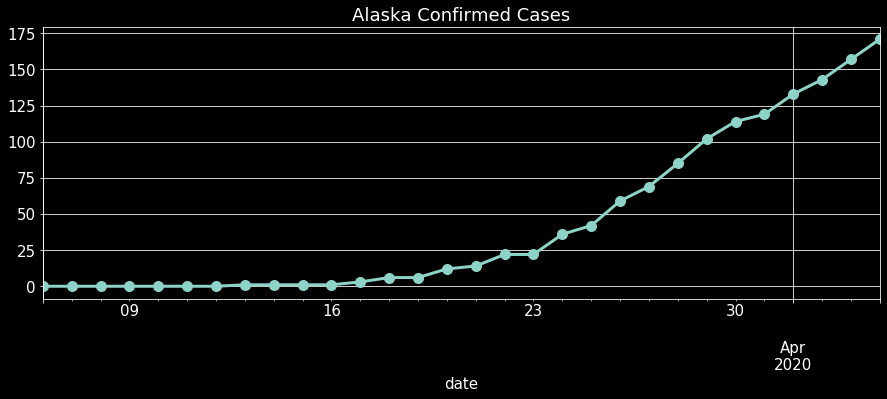

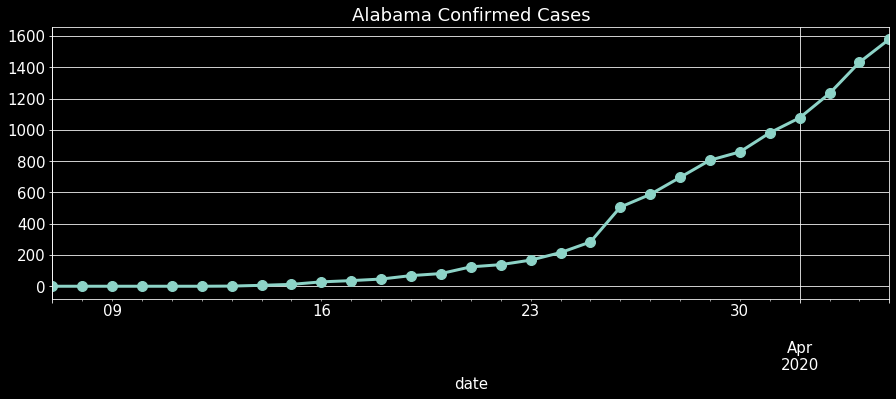

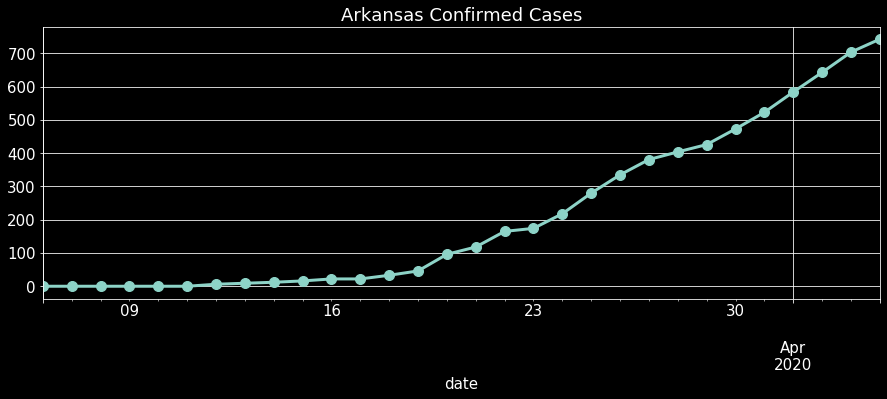

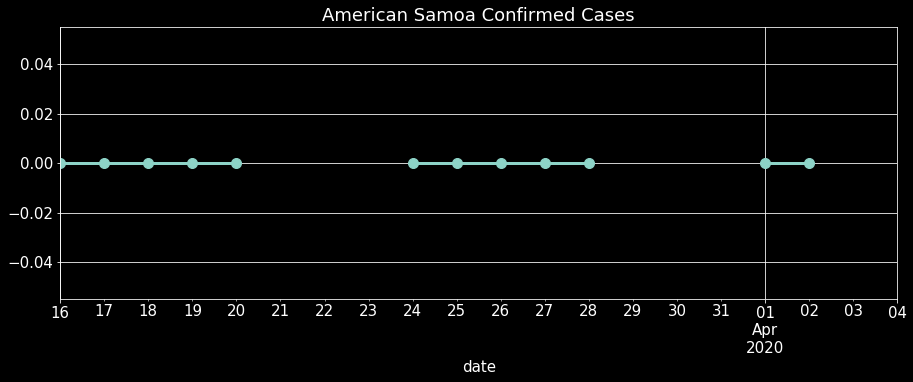

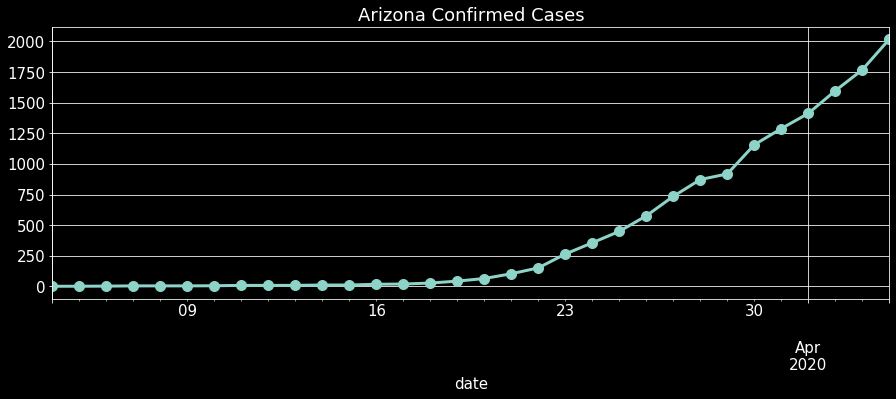

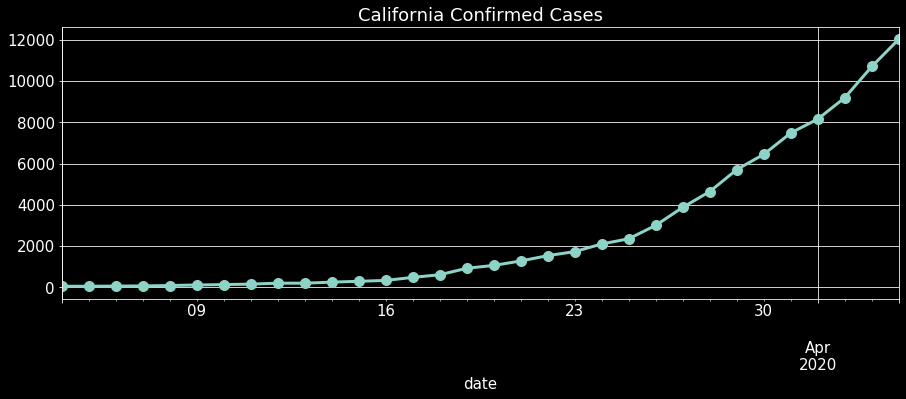

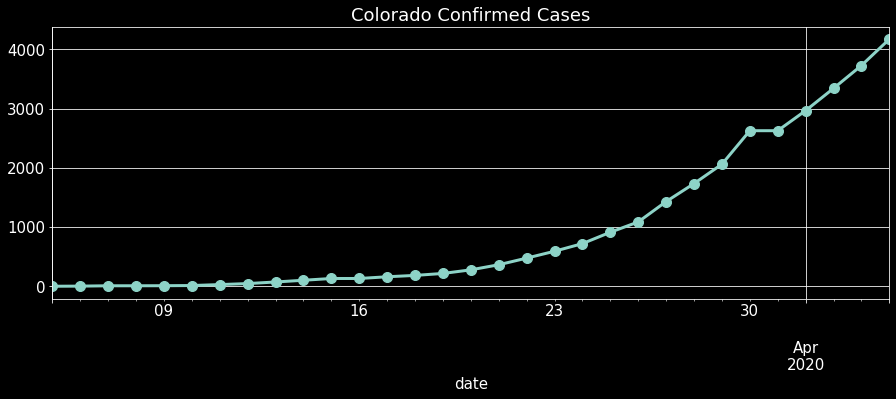

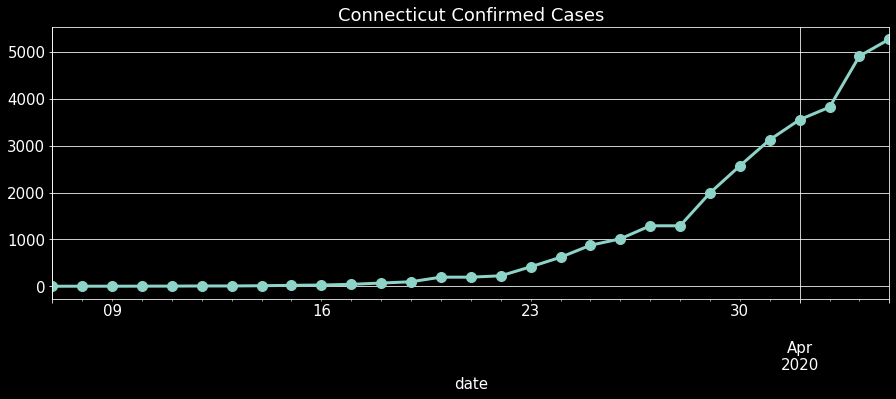

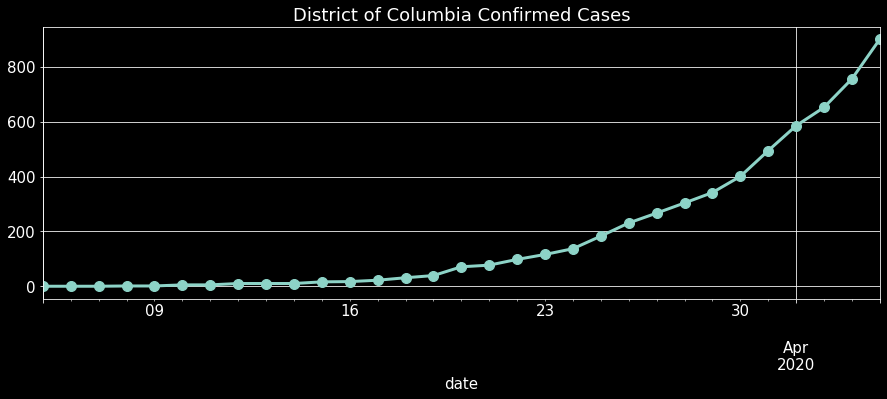

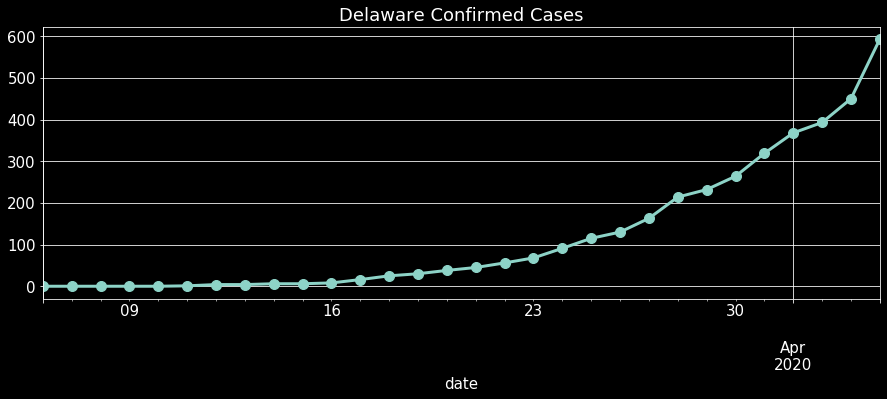

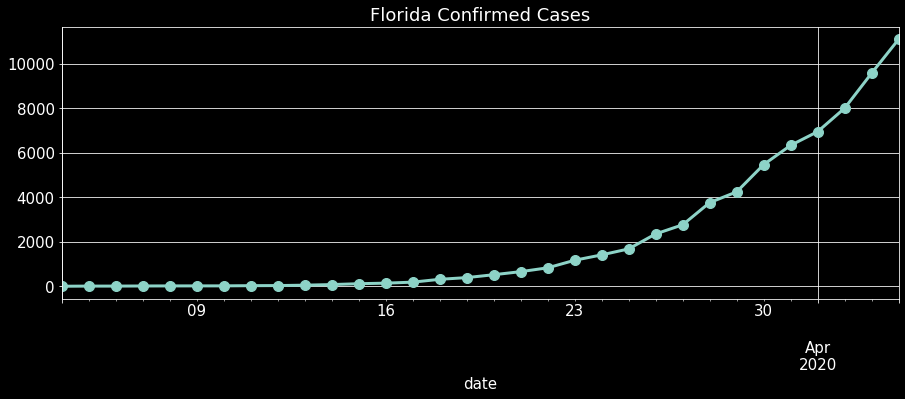

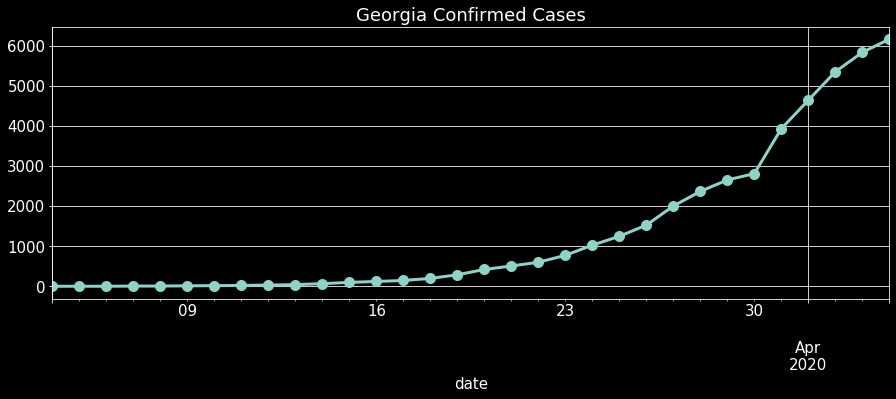

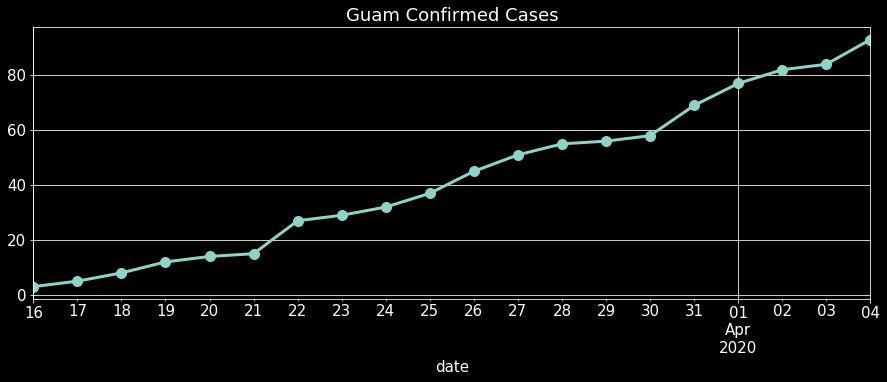

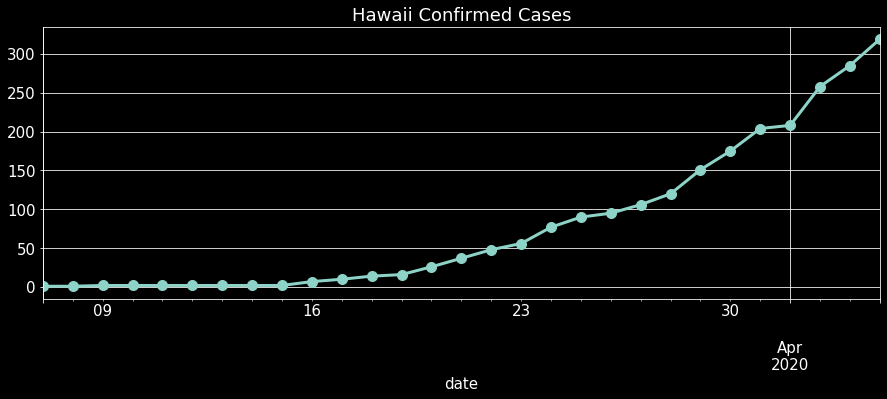

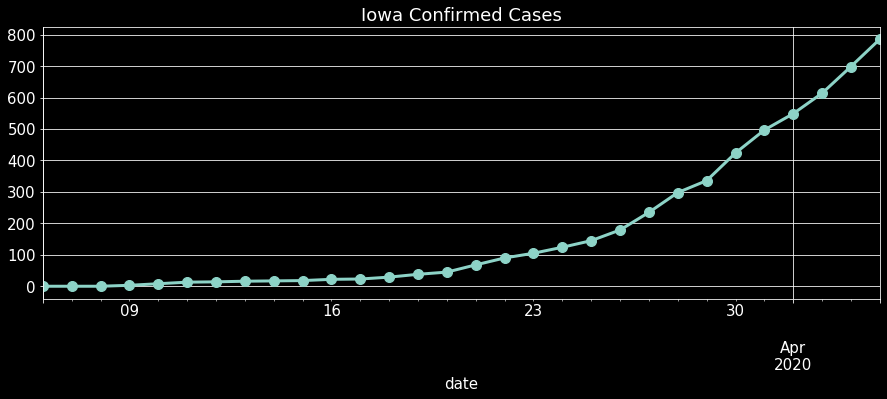

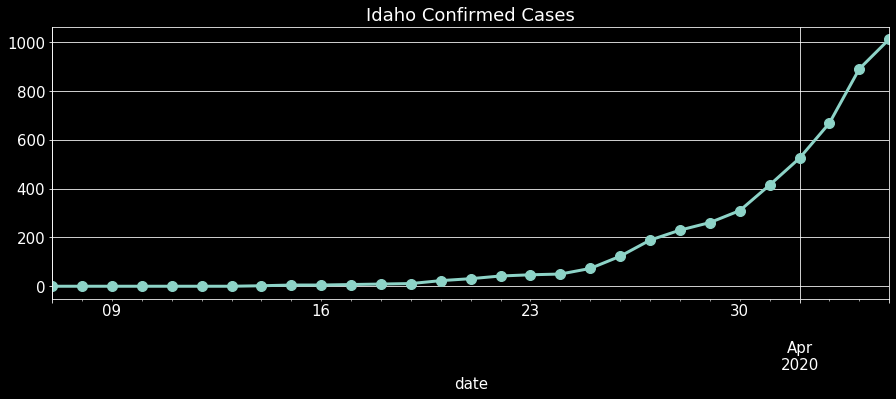

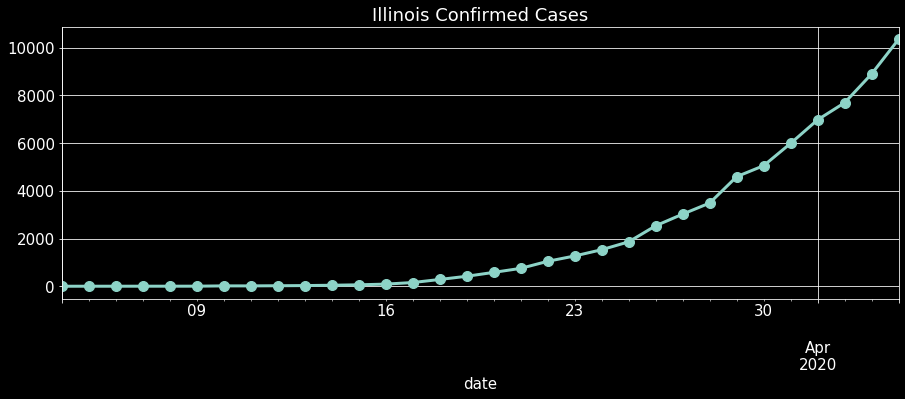

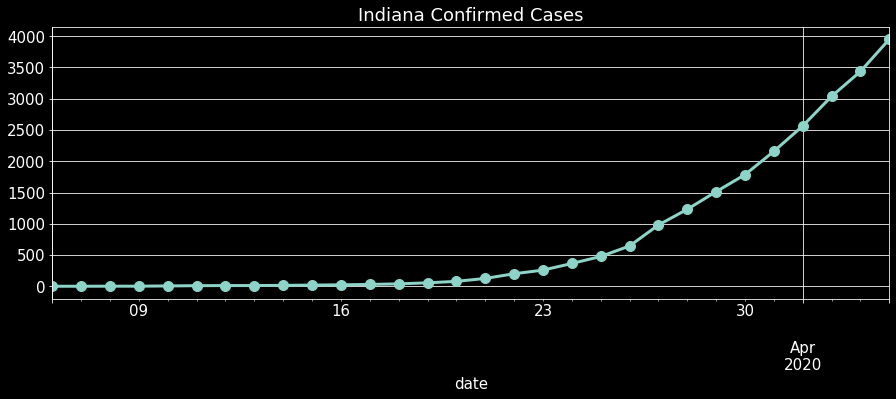

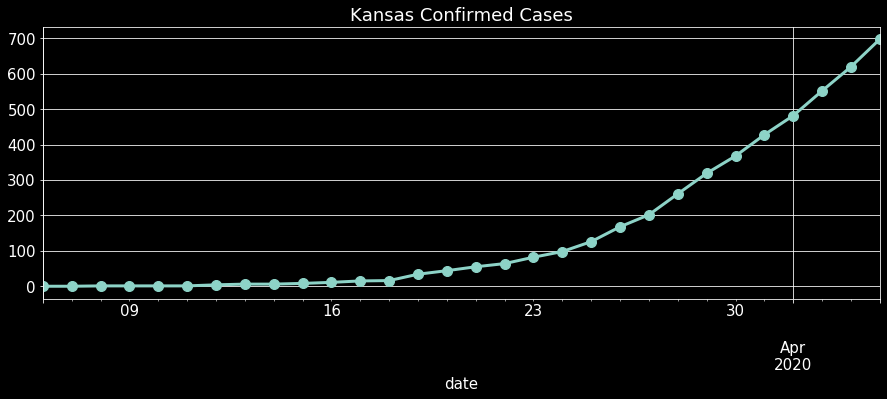

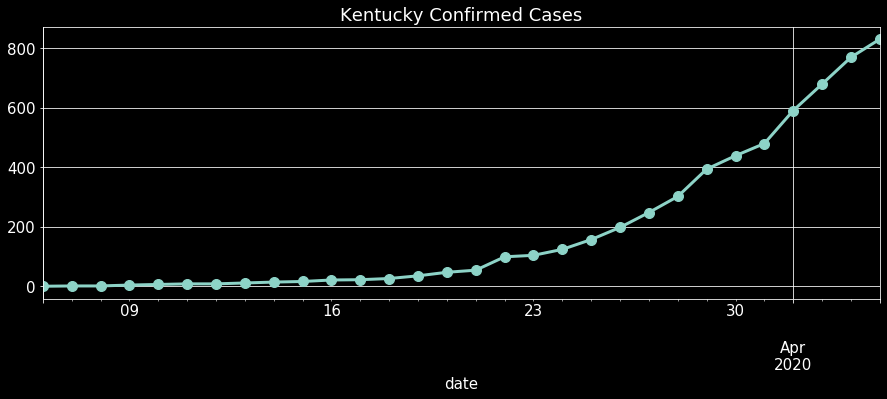

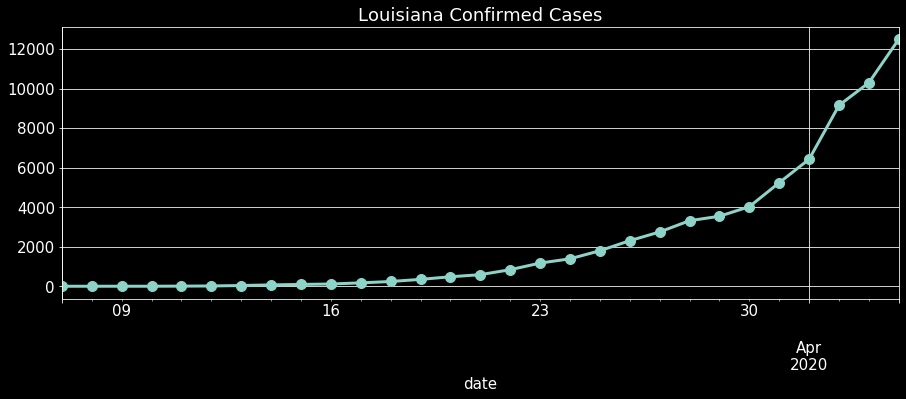

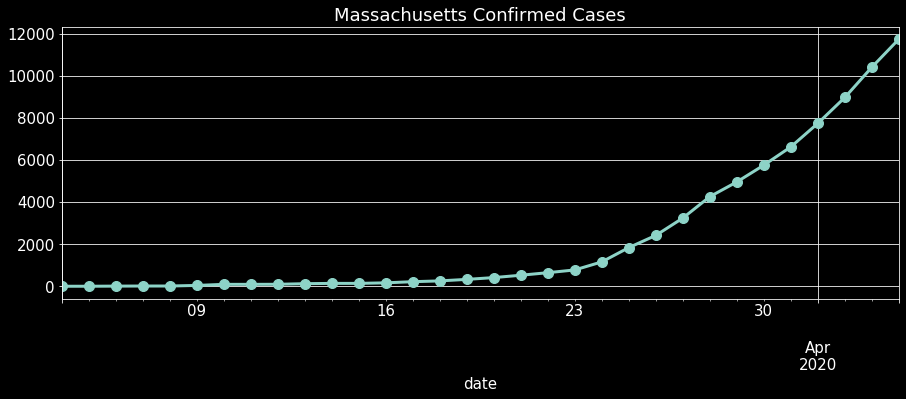

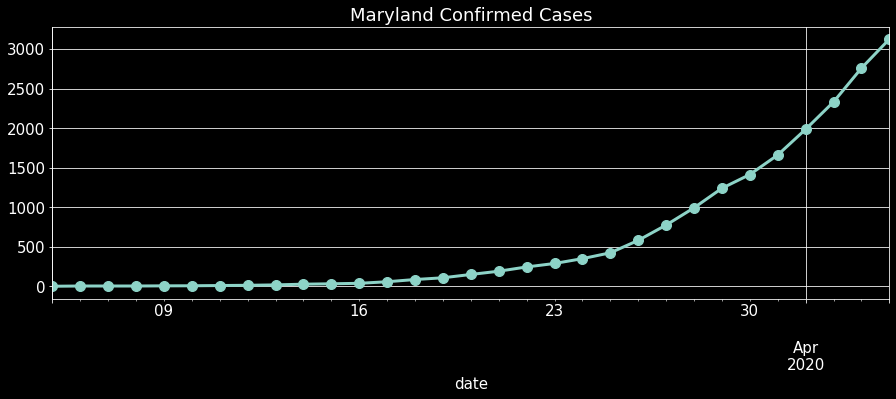

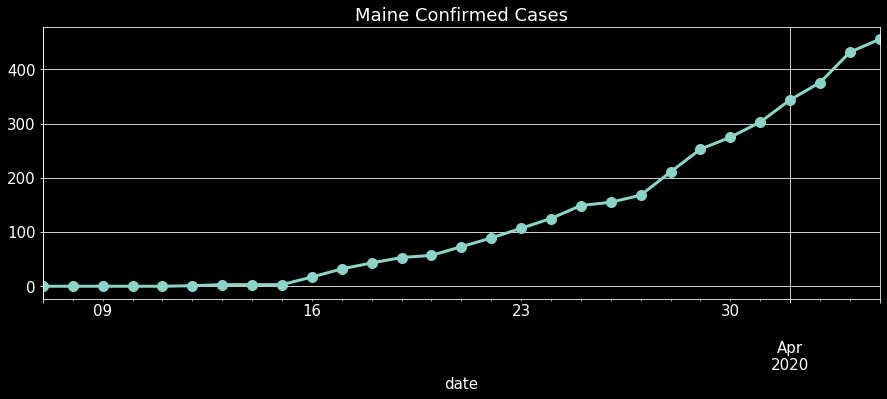

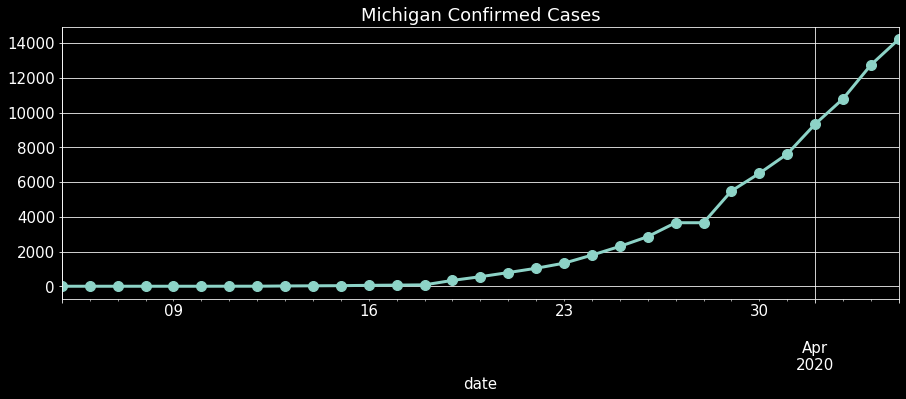

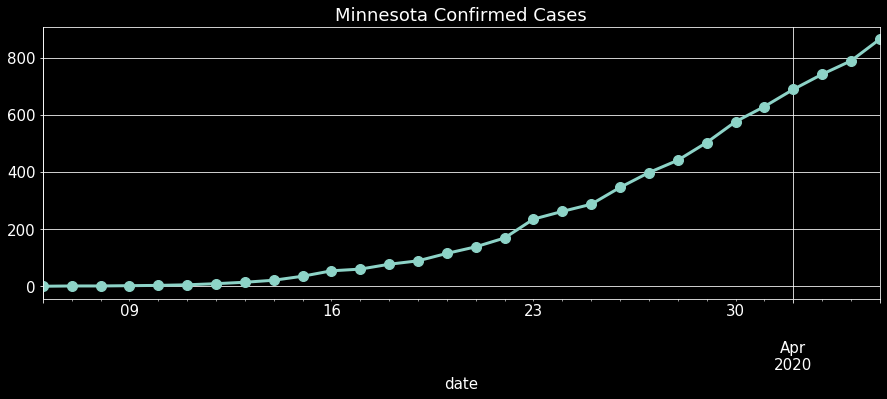

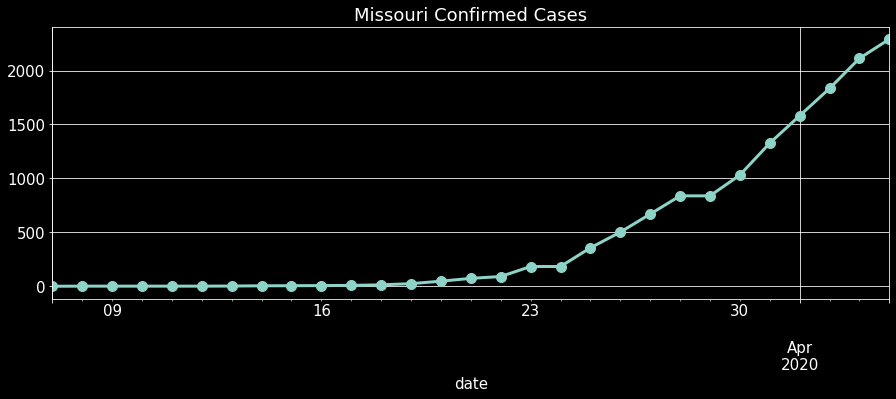

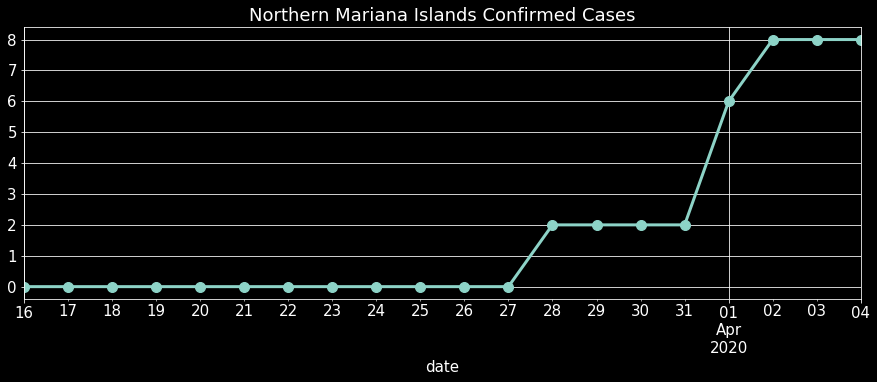

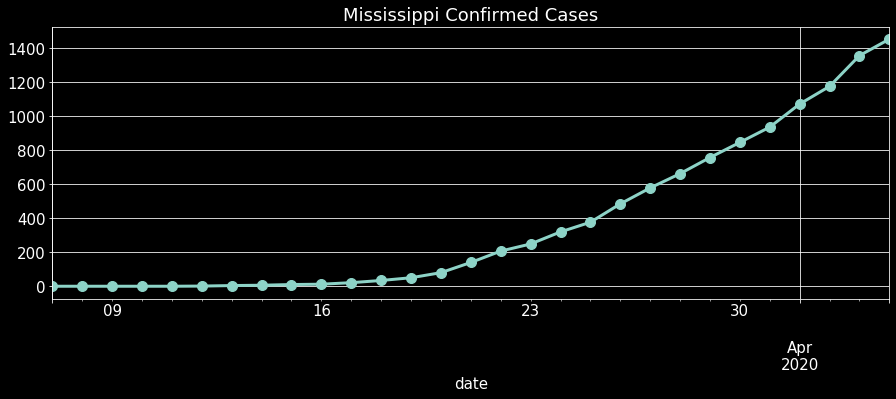

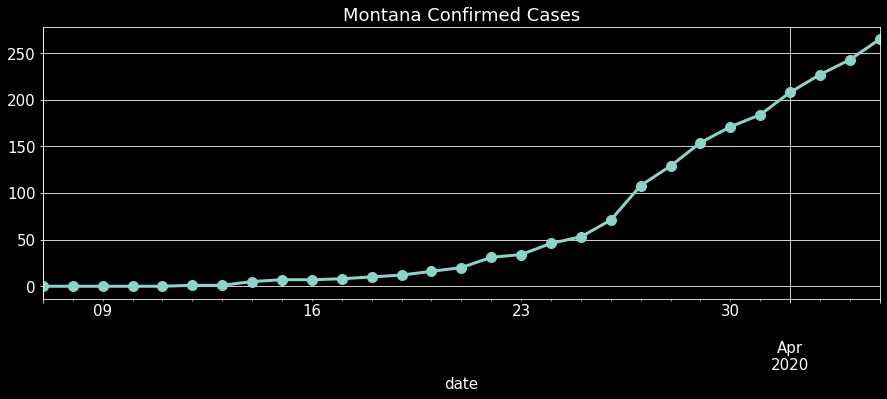

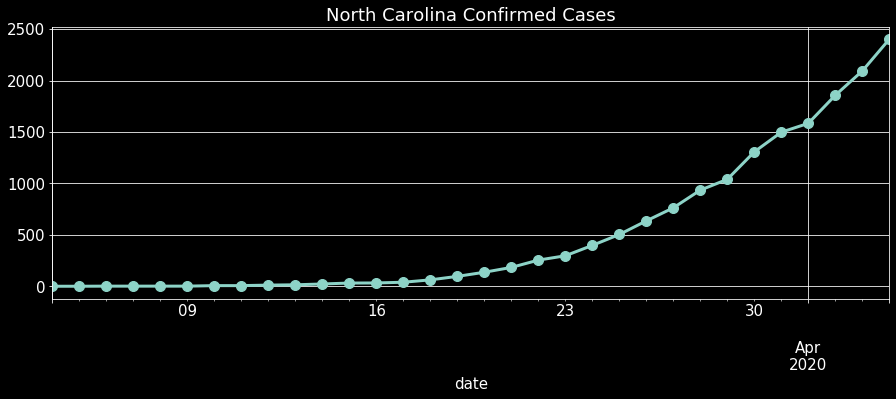

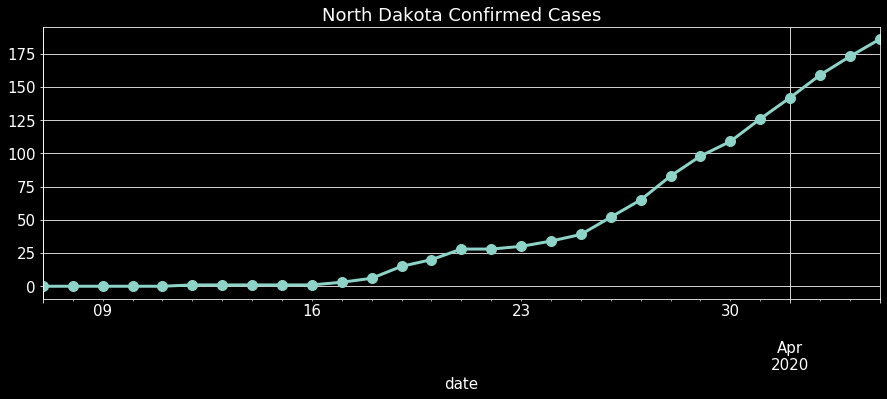

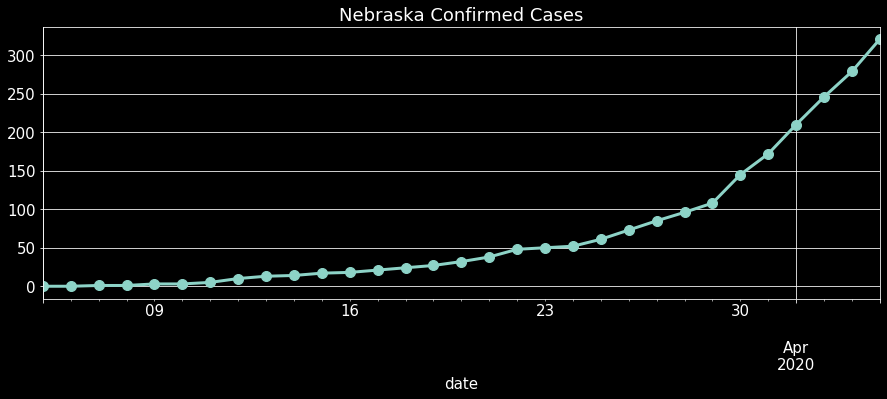

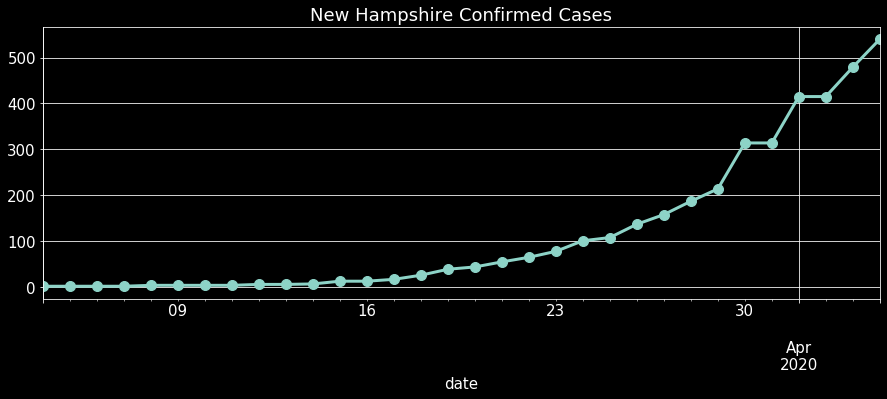

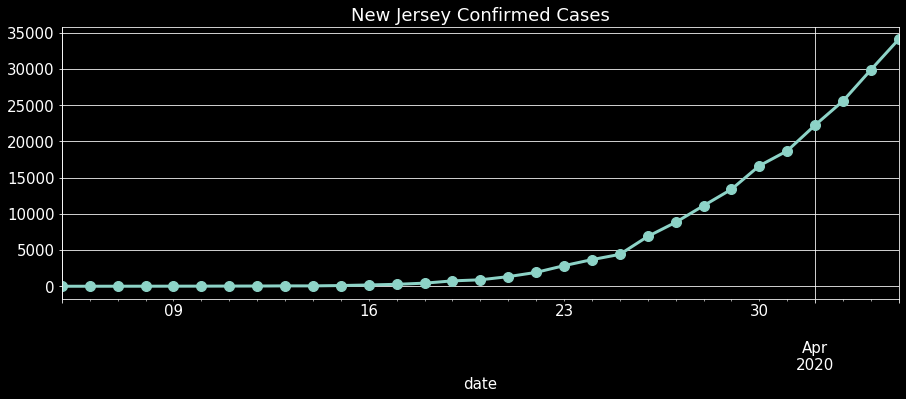

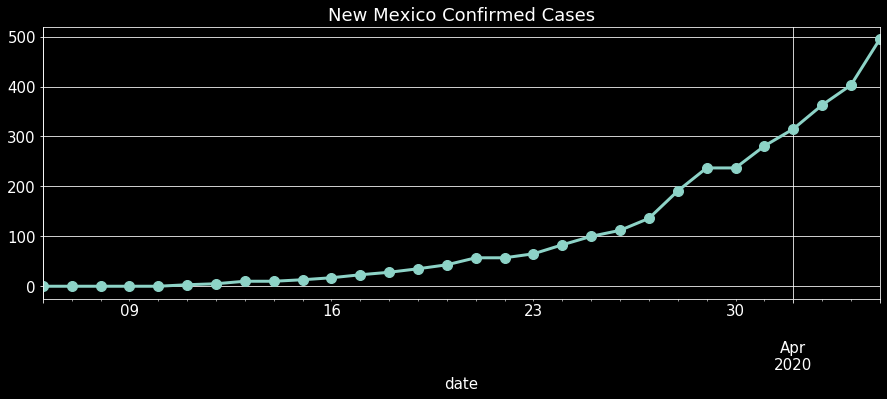

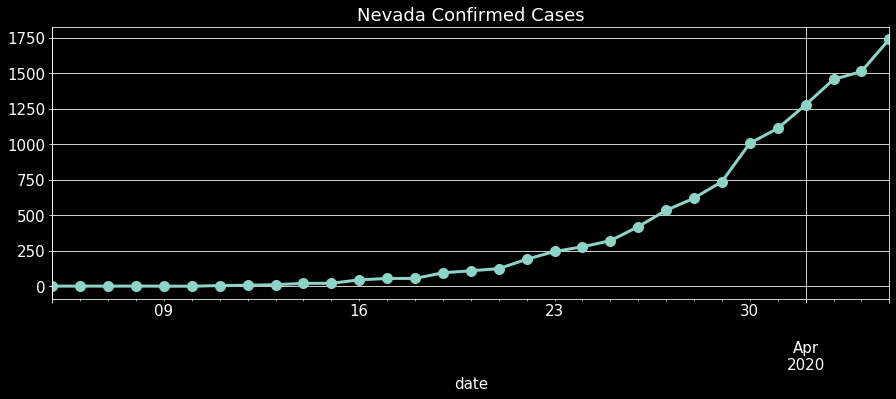

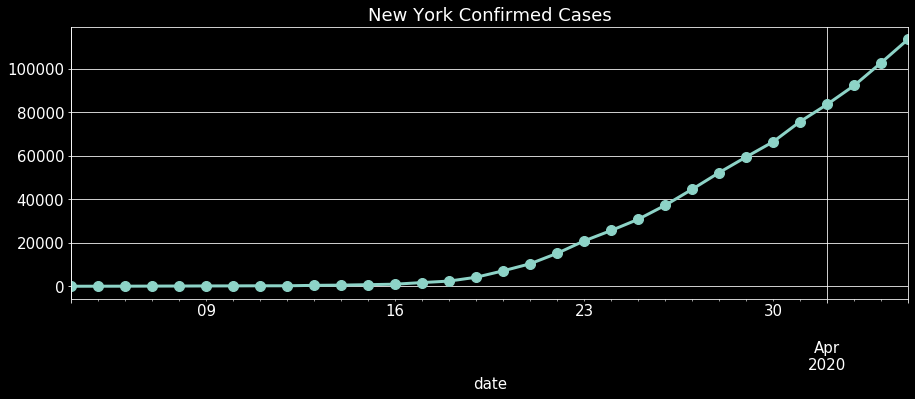

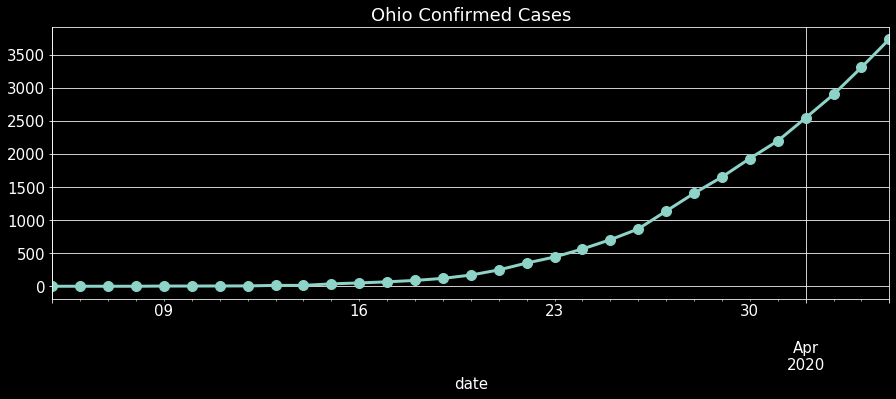

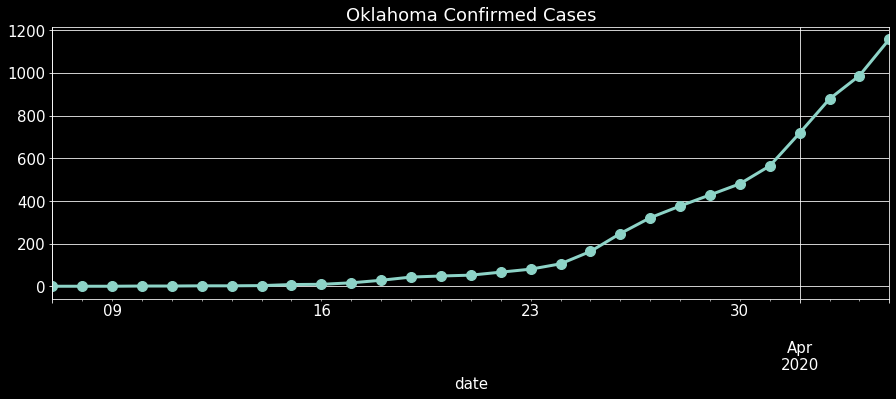

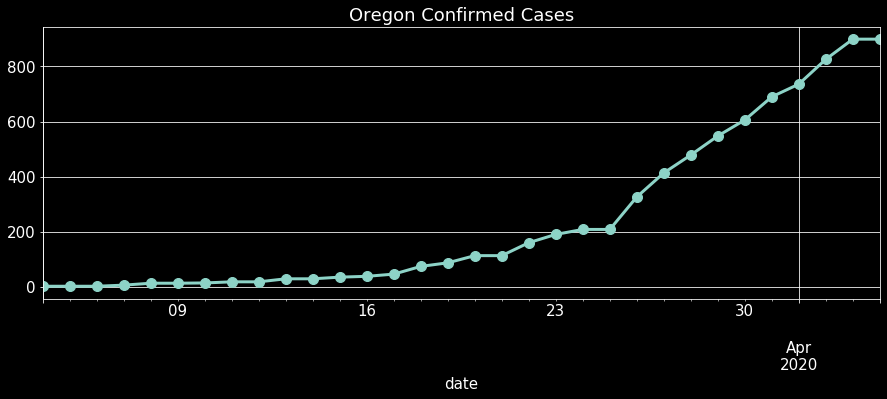

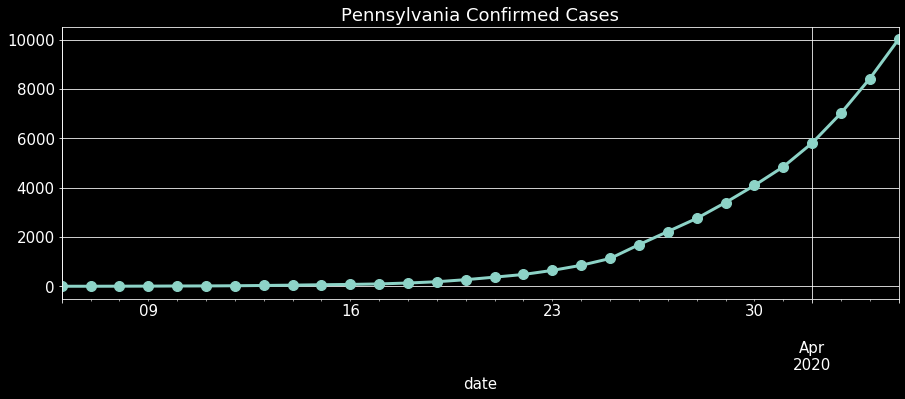

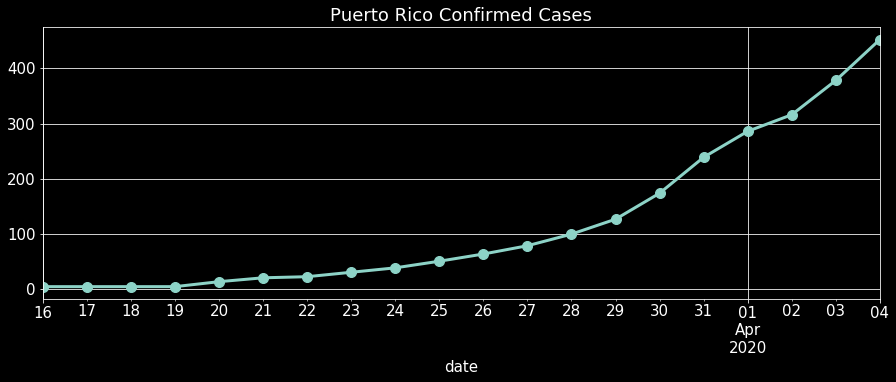

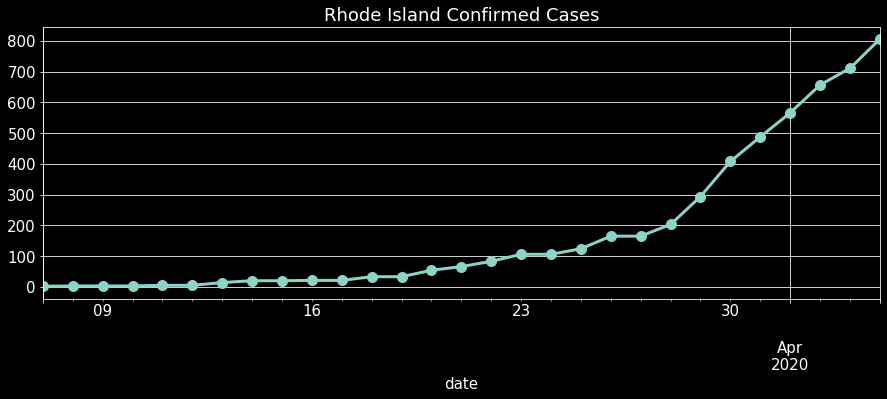

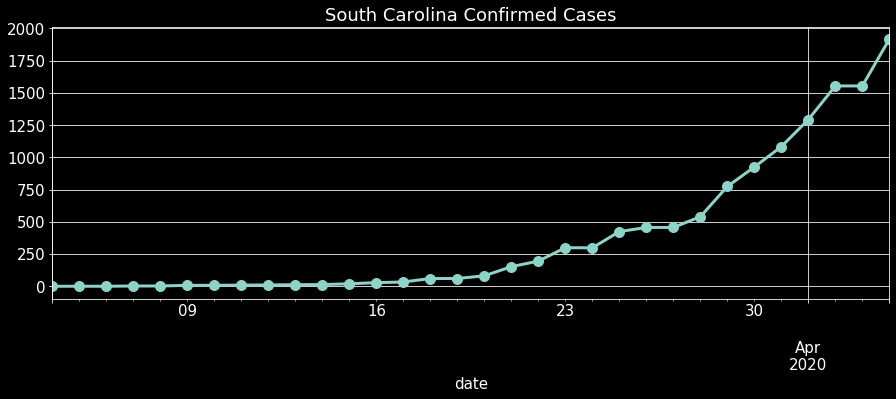

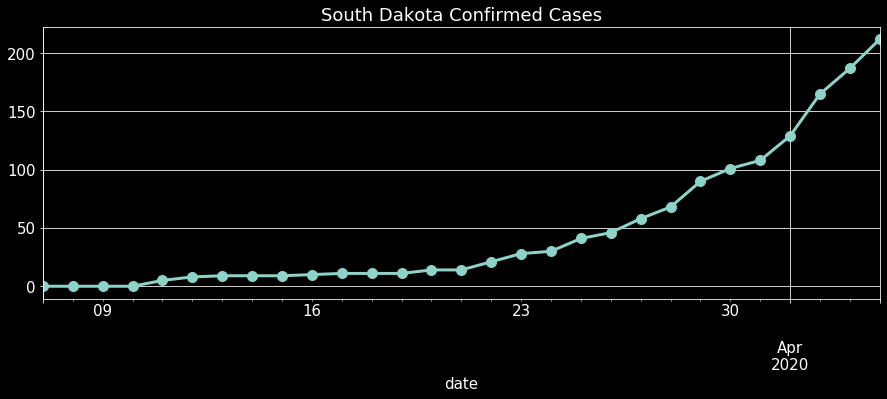

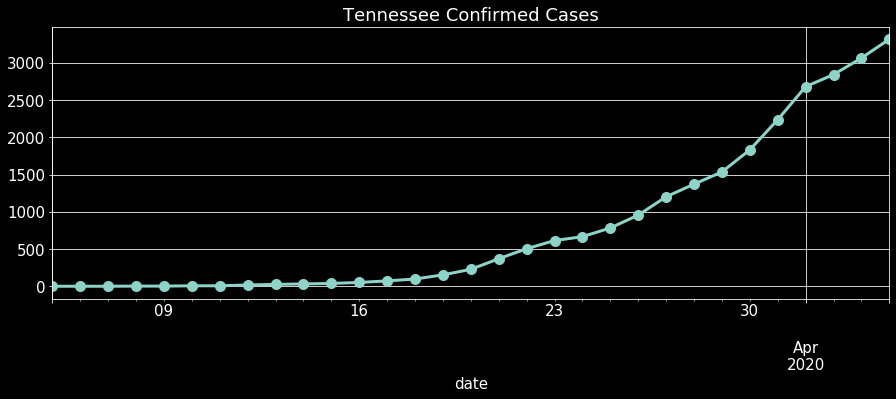

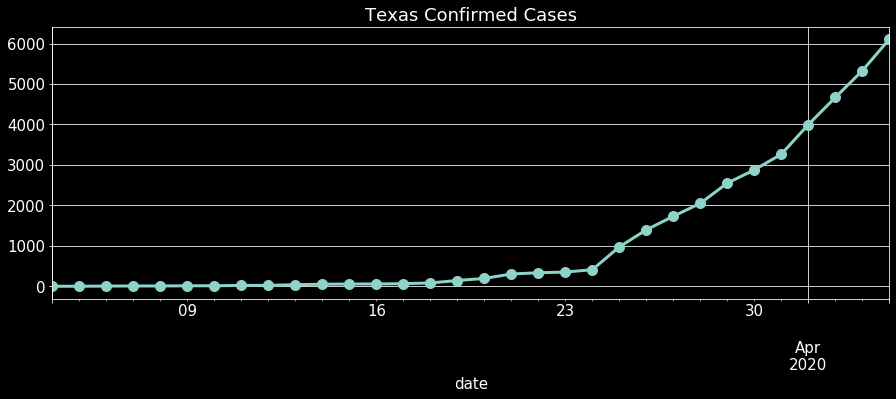

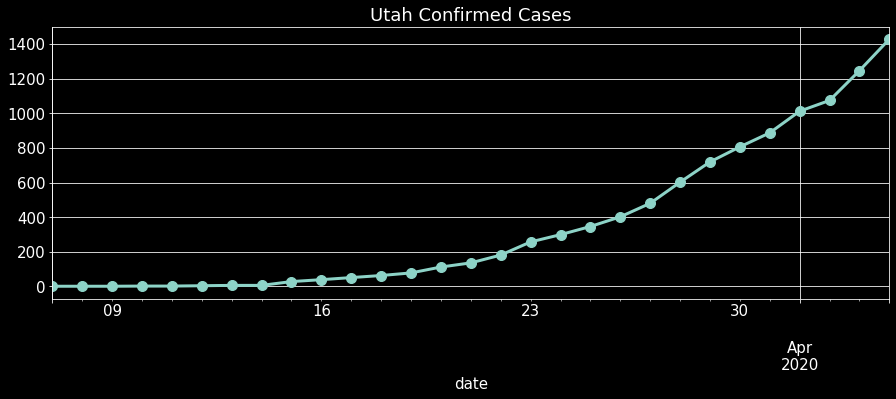

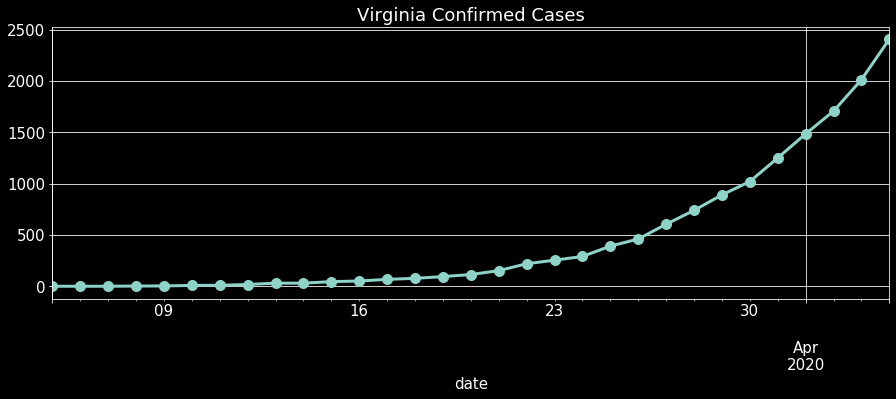

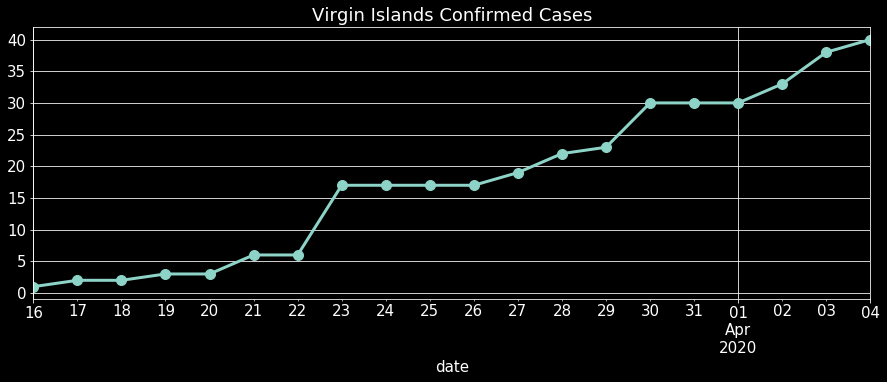

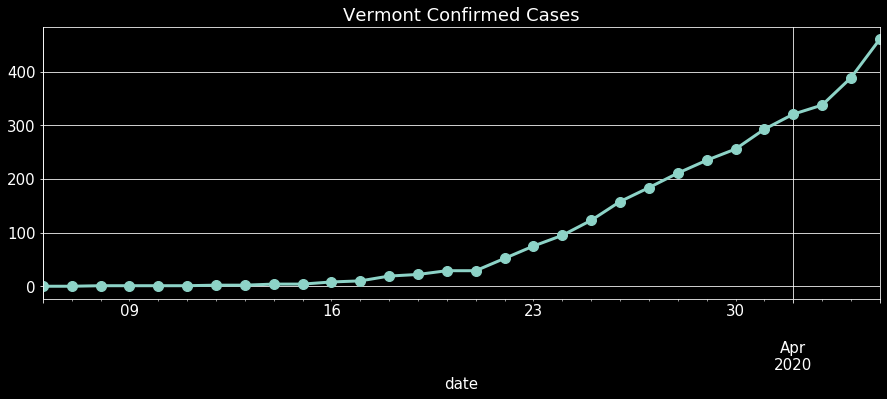

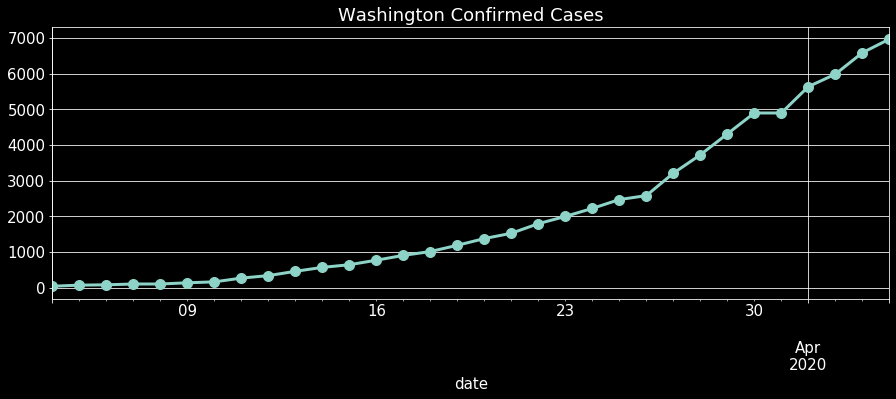

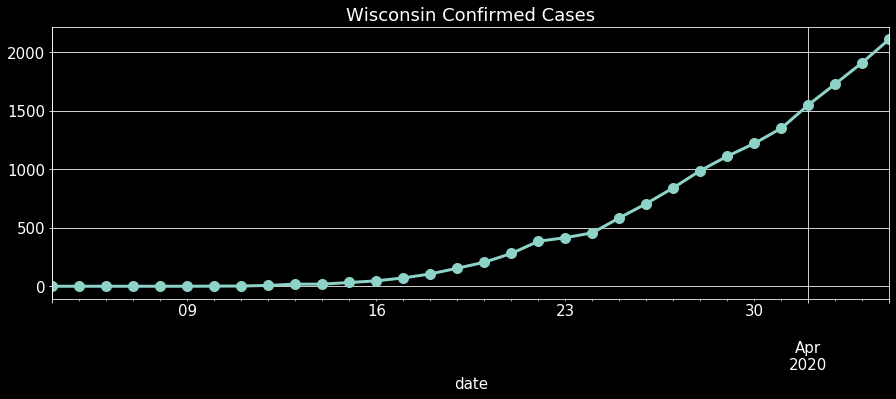

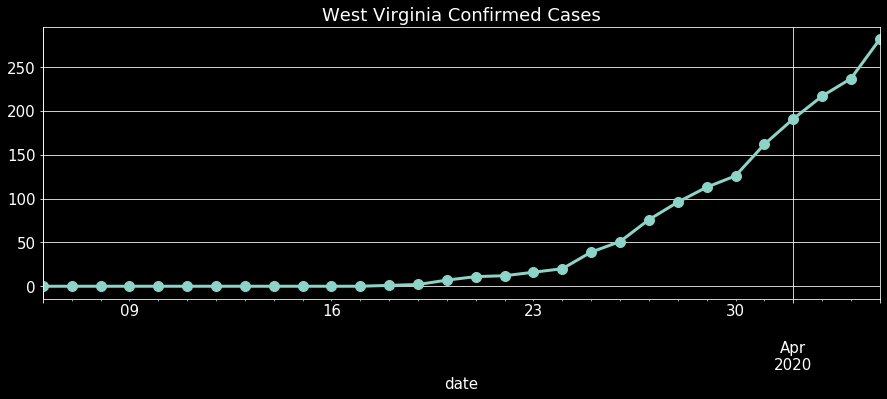

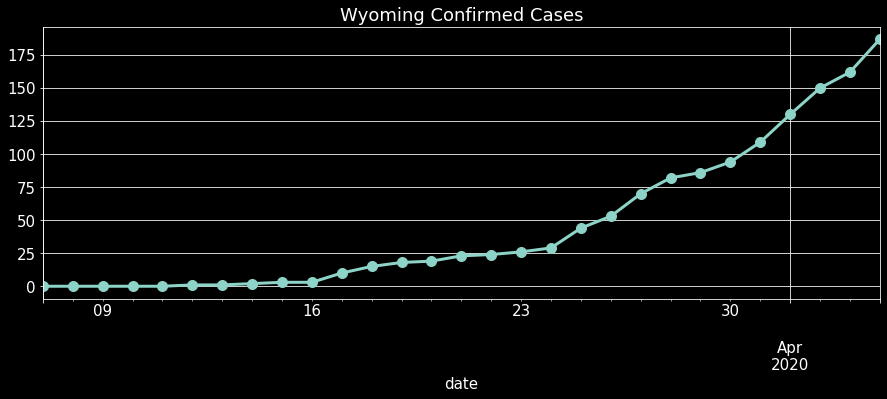

In [96]:
abbrev = us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev = dict([[v,k] for k,v in abbrev.items()])

states.date = pd.to_datetime(states.date)

states.set_index('date', inplace = True)

for state in states.state.unique():
    fig = plt.figure(figsize=(15,5))
    states[states.state == state].positive.plot(linewidth=3, marker = 'o', markersize=10)
    plt.title('{} Confirmed Cases'.format(abbrev[state]))
    plt.grid()
    fig.savefig('states/images/{}_cases.png'.format(state))

# Old Scraping Code

In [130]:
# ## Import Libraries
# import pandas as pd
# import numpy as np
# from datetime import datetime
# from selenium import webdriver
# import json
# import string
# from colour import Color
# import plotly.graph_objects as go
# import matplotlib.pyplot as plt
# from time import sleep

# ## Connect Chrome Driver
# driver = webdriver.Chrome('/Users/joel/selenium_drivers/chromedriver 3')

# ## Scraping Code

# driver.get('https://docs.google.com/spreadsheets/d/18oVRrHj3c183mHmq3m89_163yuYltLNlOmPerQ18E8w/htmlview?sle=true#')
# sleep(3)
# driver.find_element_by_partial_link_text('States daily').click()
# table = driver.find_element_by_xpath('//*[@id="916628299"]/div/table/tbody')
# rows = table.find_elements_by_tag_name('tr')
# columns = rows[0].find_elements_by_tag_name('td')
# rows = rows[2:]

# ## Update Data
# with open('coronavirus.json') as f:
#     data = json.load(f)
#     state = data['state']

#     date_  = []
#     state_ = []
#     positive_ = []
#     negative_ = []
#     pending_ = []
#     hospitalization_ = []
#     death_ = []
#     total_ = []
    
#     for row in rows:
#         cells = row.find_elements_by_tag_name('td')

#         date_ob = cells[0].text
#         state_ob= cells[1].text
#         positive_ob = cells[2].text
#         negative_ob = cells[3].text
#         pending_ob = cells[4].text
#         hosp_ob = cells[5].text
#         death_ob = cells[6].text
#         total_ob = cells[7].text
#         if not hosp_ob:
#             hosp_ob = ''

#         date_.append(date_ob)
#         state_.append(state_ob)
#         positive_.append(positive_ob)
#         negative_.append(negative_ob)
#         pending_.append(pending_ob)
#         hospitalization_.append(hosp_ob)
#         death_.append(death_ob)
#         total_.append(total_ob)
        
#     state['Date'] = date_
#     state['State'] = state_
#     state['Positive'] = positive_
#     state['Negative'] = negative_
#     state['Pending'] = pending_
#     state['Hospitalized'] = hospitalization_
#     state['Deaths'] = death_ 
#     state['Total'] = total_

# ## Save Data
# with open('coronavirus.json', mode='w', encoding='utf-8') as f:
#     json.dump(data, f)


# ## Create Daily Aggregate Data   
# with open('coronavirus.json') as f:
#     data = json.load(f)
#     state = data['state']


# df = pd.DataFrame(state)
# df = df.set_index('Date')
# df.index = pd.to_datetime(df.index)

# for column in df.columns:
#     df[column] = df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# df = df.replace('', np.nan)

# columns = df.columns

# columns = columns.drop('State')

# for column in columns:
#     df[column] = df[column].astype(float)

# grouped = df.groupby(pd.Grouper(freq='D')).sum()

# collected = []
# for idx in grouped.index.unique():
#     day = df.loc[idx]
#     count = len(day[day.Positive > 0])
#     collected.append(count)

# grouped['state_count'] = collected


# data['daily_summary']['Date'] = ['{}/{}/{}'.format(x.month,x.day, x.year) for x in grouped.index]
# data['daily_summary']['Positive'] = grouped.Positive.tolist()
# data['daily_summary']['Negative'] = grouped.Negative.tolist()
# data['daily_summary']['Pending'] = grouped.Pending.tolist()
# data['daily_summary']['Hospitalized'] = grouped.Hospitalized.tolist()
# data['daily_summary']['Total'] = grouped.Total.tolist()
# data['daily_summary']['Confirmed States'] = grouped.state_count.tolist()

# with open('coronavirus.json', mode='w', encoding='utf-8') as f:
#     json.dump(data, f)

# ## Visualizations    
# plt.style.use('dark_background')
# with open('coronavirus.json') as f:
#     plotting = json.load(f)

# plotting = pd.DataFrame(plotting['daily_summary'])
# plotting.set_index('Date', drop = True, inplace = True)

# fig = plt.figure(figsize=(15,5))
# grouped.Positive.plot(label = 'Positive', linewidth=3)
# plt.title('Positive Test Results COVID-19')
# fig.gca()
# plt.show()
# fig.savefig('images/positive_tests.png')

# fig = plt.figure(figsize=(15,5))
# grouped.Deaths.plot()
# plt.title('US Deaths')
# plt.show()
# fig.savefig('images/deaths.png')

# fig = plt.figure(figsize=(15,5))
# grouped['diff'] = grouped.Positive.diff()
# grouped['diff'].plot()
# plt.title('Positive Case Growth')
# plt.show()
# fig.savefig('images/positive_case_growth.png')

# fig = plt.figure(figsize=(15,5))
# df[df.State == 'IL'].Positive.plot(linewidth=3)
# plt.title('Confirmed COVID-19 Cases in Illinois')
# plt.show()
# fig.savefig('images/illinois_cases.png')

# fig = plt.figure(figsize=(15,5))
# df[(df.State == 'NY')].Positive.plot(linewidth=3)
# plt.title('Confirmed COVID-19 Cases in NY');
# plt.show()
# fig.savefig('images/ny_cases.png')

# fig = plt.figure(figsize=(15,5))
# df[df.State == "IA"].Positive.plot()
# plt.title('Confirmed COVID-19 Cases in Iowa')
# plt.show()
# fig.savefig('images/ia_cases.png')

# top_ten = df.loc[df.index.max()].sort_values(by='Positive', ascending=False)[:10]
# ten_states = top_ten.State
# fig = plt.figure(figsize=(15,5))
# for state in ten_states:
#     df[df.State == state].Positive.plot(label = state, linewidth=3)
# plt.title('10 states with the most confirmed cases')
# plt.ylabel('Positive Test Results')
# plt.legend(loc='upper left')
# plt.show()
# fig.savefig('images/top_ten_states.png')

# mapping_df = df.loc[df.index.max()].groupby('State').sum()

# fig = go.Figure(data=go.Choropleth(
#     locations=mapping_df.index, # Spatial coordinates
#     z = mapping_df['Positive'], # Data to be color-coded
#     locationmode = 'USA-states', # set of locations match entries in `locations`
#     colorscale = 'Reds',
#     colorbar_title = "Confirmed Cases",
# ))

# fig.update_layout(
#     title_text = 'COVID-19 Cases by State',
#     geo_scope='usa', # limite map scope to USA
# )

# fig.show()
# fig.write_image('images/positive_cases_map.png')

# today = df.loc[df.index.max()]
# today = today.dropna(subset = ['Positive'])

# today['positive_rate'] = today.Positive/today.Total

# rates = today.sort_values(by='positive_rate', ascending = False)
# rates = rates[['State', 'positive_rate', 'Deaths', 'Positive']]

# rates = rates.set_index('State')



# colors = [Color(pick_for=x).get_hex_l() for x in rates.index]

# fig = go.Figure([go.Bar(x=rates.index, y=rates.positive_rate, marker_color=colors)])
# fig.update_layout(
#     title_text = 'Positive Test Rate'
# )
# fig.show()
# fig.write_image('images/positive_test_rate.png')

# rates['death_rate'] = rates.Deaths/rates.Positive

# rates = rates.sort_values(by='death_rate', ascending=False)

# fig = go.Figure([go.Bar(x=rates.index, y=rates.death_rate, marker_color=colors)])
# fig.update_layout(
#     title_text = 'Mortality Rate',
#     geo_scope='usa', # limite map scope to USA
# )
# fig.show()
# fig.write_image('images/mortality_rate.png')

In [57]:
us.positive[0] * .25 + us.positive[0]

230962.5

In [58]:
us.positive[0]

184770

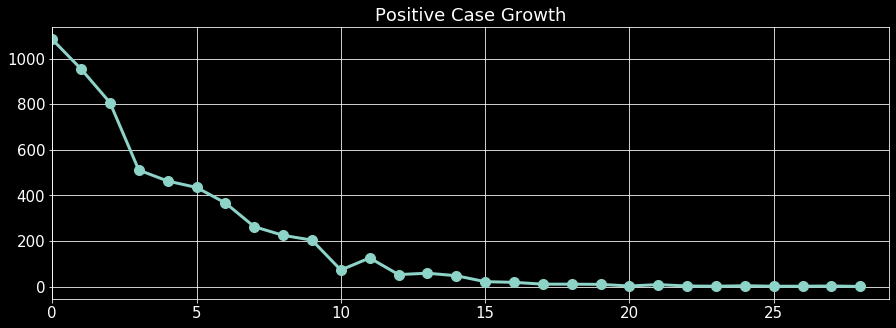

In [63]:
us_rev = us.iloc[::-1].death.diff()
fig = plt.figure(figsize=(15,5))
us_rev.plot(linewidth=3, marker = 'o', markersize=10)
plt.title('Positive Case Growth')
plt.grid()
plt.show()

In [75]:
us_rev = us.iloc[::-1]

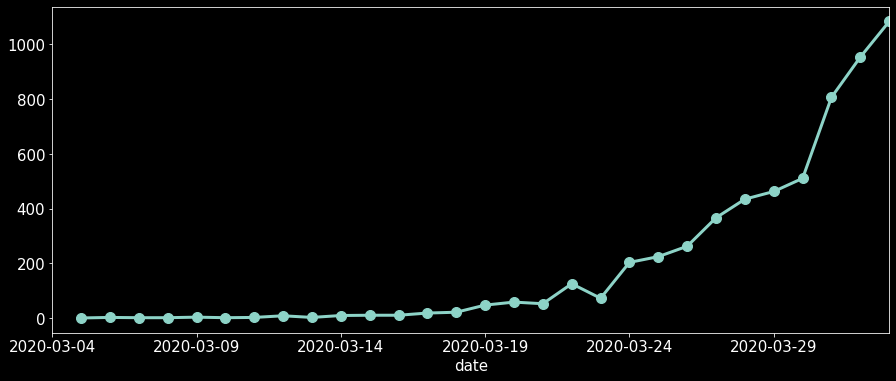

In [80]:
plt.figure(figsize = (15,6))
us_rev.deathIncrease.plot(linewidth=3, marker = 'o', markersize=10)

In [82]:
test = [1,2,3,4,5]
test1 = [[1,2,3], [2,3,42]]
[word for word in test1 if word not in test]
    

[[1, 2, 3], [2, 3, 42]]

In [93]:
test = pd.DataFrame([['something', 'nothing'], ['okay', 'Maybe']])
ok = ['maybe']

In [94]:
test[test[1].isin(ok)]

,0,1
